In [1]:
import pandas as pd
import os 
import numpy as np
import tensorflow
import itertools
import keras
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation

Using TensorFlow backend.


In [2]:
#啟用GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
#Data_preprocessing
#read_data
path='./data/'
df = pd.read_csv(path+'test.csv')
df

,date,time,team_home,team_away,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,...,home_batter9,away_total,home_total,yard_wOBA,umpire_K/BB,total,over,under,total_score,result
0,2016/6/8,19,BAL,KC,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,...,0.117572,0,4,1.008,2.56962,2.0,1.5,2.5,4.0,over
1,2016/7/1,19,BOS,LAA,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,...,0.021867,0,5,0.956,2.43529,2.0,1.4,2.6,5.0,over
2,2015/4/6,13,DET,MIN,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,...,0.156085,0,3,0.994,2.32558,2.0,2.0,1.9,3.0,over
3,2016/5/13,19,CLE,MIN,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,...,0.143427,4,3,0.994,2.53750,2.0,1.4,2.6,7.0,over
4,2016/5/27,19,CLE,BAL,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,...,0.130370,3,3,0.972,2.23864,2.0,1.4,2.6,6.0,over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,2014/4/19,13,CLE,TOR,2.57,0.147727,0.163825,0.166009,0.181172,0.154922,...,0.173332,3,0,0.979,2.15909,6.0,1.8,2.0,3.0,under
10178,2019/6/11,20,HOU,MIL,4.64,0.137779,0.198390,0.146276,0.155495,0.152324,...,0.128799,3,8,0.996,2.88889,6.0,1.5,2.6,11.0,over
10179,2019/5/4,19,CIN,SF,4.64,0.141274,0.086450,0.137760,0.128776,0.140391,...,0.127674,1,8,1.000,2.48810,6.0,1.8,2.0,9.0,over
10180,2013/4/7,13,NYM,MIA,5.76,0.145440,0.138137,0.173896,0.097862,0.107932,...,0.076126,3,1,1.031,2.49383,6.0,2.0,1.8,4.0,under


In [4]:
df.describe()

,time,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,away_batter7,away_batter8,...,home_batter8,home_batter9,away_total,home_total,yard_wOBA,umpire_K/BB,total,over,under,total_score
count,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,...,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000
mean,17.296995,4.142664,0.156607,0.156285,0.164602,0.158585,0.152053,0.146218,0.141899,0.136822,...,0.134266,0.120893,2.390002,2.638676,0.996176,2.466811,4.128560,1.805755,2.083962,5.028678
std,2.726074,0.727638,0.028044,0.026000,0.027659,0.028541,0.027079,0.028694,0.034586,0.034308,...,0.027658,0.038947,2.294031,2.451768,0.015804,0.197724,0.754726,0.191028,0.365813,3.351925
min,11.000000,0.890000,0.057049,0.050897,0.065429,0.058516,0.049427,0.045621,0.052543,0.036987,...,0.009046,0.008620,0.000000,0.000000,0.925000,1.647620,2.000000,1.100000,1.500000,0.000000
25%,15.000000,3.650000,0.141329,0.140673,0.148412,0.142292,0.137112,0.131029,0.125607,0.119555,...,0.117617,0.099161,1.000000,1.000000,0.987000,2.337210,3.500000,1.800000,1.900000,2.000000
50%,19.000000,4.140000,0.154839,0.155075,0.162446,0.156770,0.150451,0.144935,0.140260,0.135281,...,0.134423,0.120378,2.000000,2.000000,0.996000,2.455700,4.000000,1.800000,2.000000,5.000000
75%,19.000000,4.590000,0.169447,0.170443,0.179060,0.173043,0.165426,0.159221,0.155075,0.150977,...,0.150212,0.140714,4.000000,4.000000,1.003000,2.600000,4.500000,1.900000,2.100000,7.000000
max,22.000000,10.560000,0.996979,0.550039,1.307193,0.711126,0.778738,0.897985,1.766311,1.770841,...,0.286557,1.020146,16.000000,19.000000,1.157000,3.216220,6.000000,2.700000,5.000000,25.000000


In [5]:
df.dtypes.value_counts()

float64    26
object      4
int64       3
dtype: int64

In [6]:
df.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

date         1735
team_home      26
team_away      30
result          3
dtype: int64

In [7]:
#改時間成開賽後幾周
import datetime
df['date_new']=df['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d'))
#df['date_new']=df['date_new'].apply(lambda x:datetime.datetime.strftime(x, '%Y/%m/%d'))
df['date_new']=df['date_new'].apply(lambda x:datetime.datetime.strftime(x, '%W')).astype('int64')
df.drop(['date'], axis =1, inplace= True)
df['date_new']

0        23
1        26
2        14
3        19
4        21
         ..
10177    15
10178    23
10179    17
10180    13
10181    32
Name: date_new, Length: 10182, dtype: int64

In [8]:
#確認int64欄位是否為0/1格式
df.select_dtypes(include=["int64"]).apply(pd.Series.nunique, axis = 0)

time          12
away_total    17
home_total    19
date_new      29
dtype: int64

In [9]:
#將隊伍進行OneHot encoding
df= df.join(pd.get_dummies(df[['team_home', 'team_away']]))
print(df.shape)
df.head()

(10182, 89)


,time,team_home,team_away,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,...,team_away_PHI,team_away_PIT,team_away_SD,team_away_SEA,team_away_SF,team_away_STL,team_away_TB,team_away_TEX,team_away_TOR,team_away_WSH
0,19,BAL,KC,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,0.147307,...,0,0,0,0,0,0,0,0,0,0
1,19,BOS,LAA,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,0.121897,...,0,0,0,0,0,0,0,0,0,0
2,13,DET,MIN,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,0.158853,...,0,0,0,0,0,0,0,0,0,0
3,19,CLE,MIN,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,0.155667,...,0,0,0,0,0,0,0,0,0,0
4,19,CLE,BAL,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,0.131848,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#捨棄原本文字版的隊伍欄
df.drop(['team_home', 'team_away'], axis= 1, inplace= True)
df.shape

(10182, 87)

In [11]:
df.head()

,time,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,away_batter7,away_batter8,...,team_away_PHI,team_away_PIT,team_away_SD,team_away_SEA,team_away_SF,team_away_STL,team_away_TB,team_away_TEX,team_away_TOR,team_away_WSH
0,19,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,0.147307,0.147126,0.162019,...,0,0,0,0,0,0,0,0,0,0
1,19,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,0.121897,0.148551,0.139788,...,0,0,0,0,0,0,0,0,0,0
2,13,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,0.158853,0.138554,0.119803,...,0,0,0,0,0,0,0,0,0,0
3,19,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,0.155667,0.126471,0.153613,...,0,0,0,0,0,0,0,0,0,0
4,19,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,0.131848,0.146802,0.115407,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#將結果轉成0/1標籤
from sklearn.preprocessing import LabelEncoder
df['result'].replace('tie','under',inplace=True)
print('結果類別:',df['result'].nunique())
le = LabelEncoder()
df['result'] = le.fit_transform(df['result'])
df['result']

結果類別: 2


0        0
1        0
2        0
3        0
4        0
        ..
10177    1
10178    0
10179    0
10180    1
10181    1
Name: result, Length: 10182, dtype: int32

In [13]:
#抓取所有數值格式欄位
features=[]
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype =='int64':
        if df[feature].nunique != 2 and feature != 'time':
            features.append(feature)
print(features)                

['home_pitcher', 'away_batter1', 'away_batter2', 'away_batter3', 'away_batter4', 'away_batter5', 'away_batter6', 'away_batter7', 'away_batter8', 'away_batter9', 'away_pitcher', 'home_batter1', 'home_batter2', 'home_batter3', 'home_batter4', 'home_batter5', 'home_batter6', 'home_batter7', 'home_batter8', 'home_batter9', 'away_total', 'home_total', 'yard_wOBA', 'umpire_K/BB', 'total', 'over', 'under', 'total_score', 'date_new']


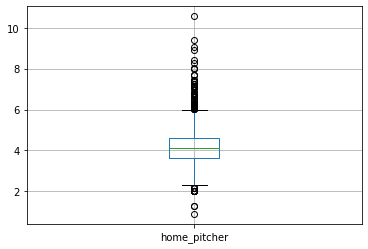

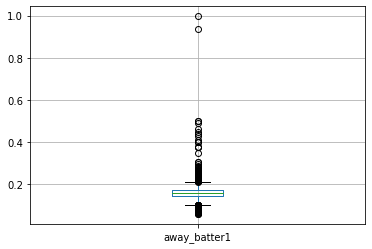

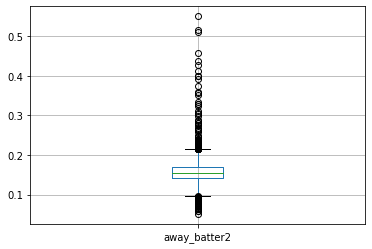

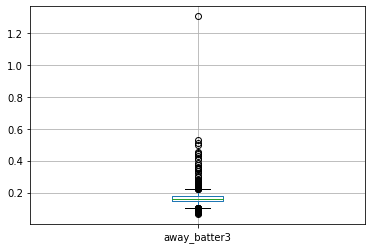

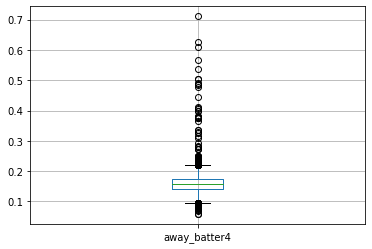

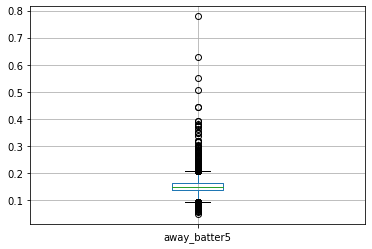

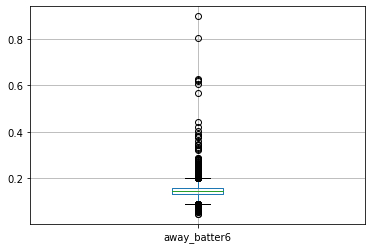

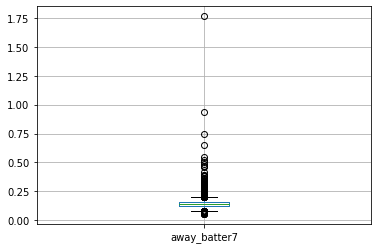

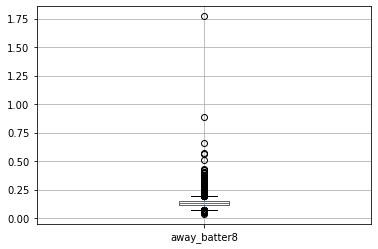

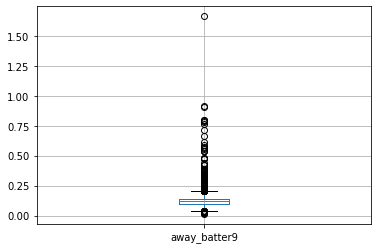

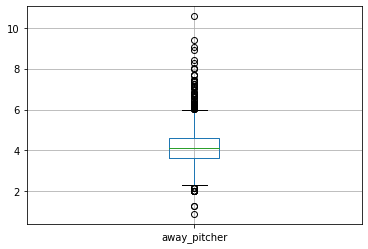

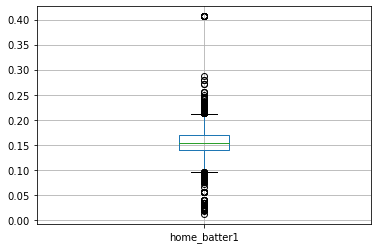

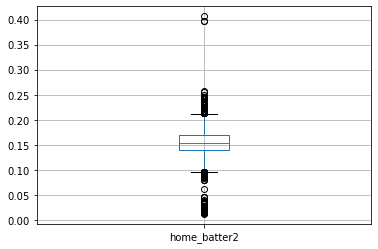

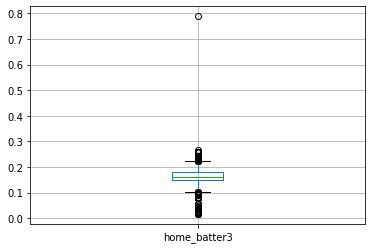

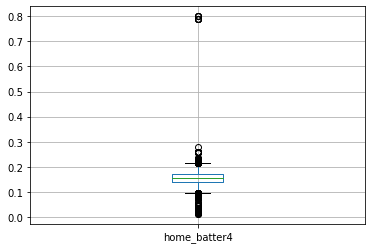

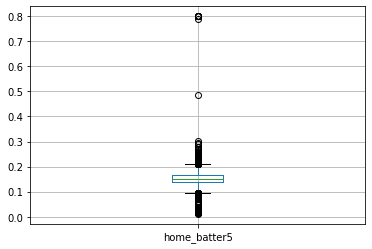

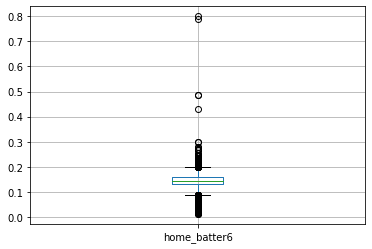

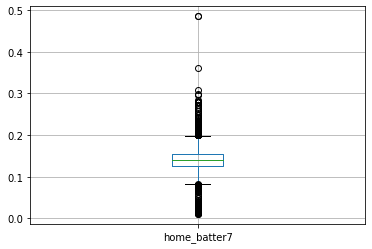

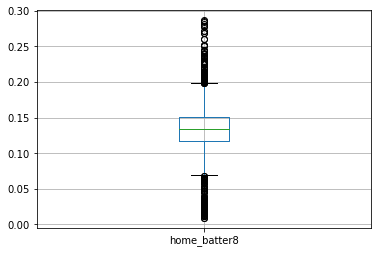

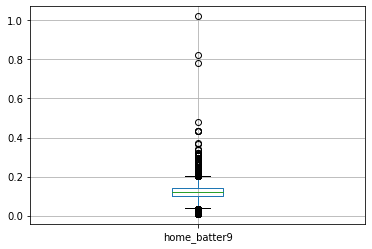

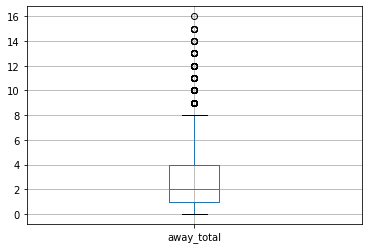

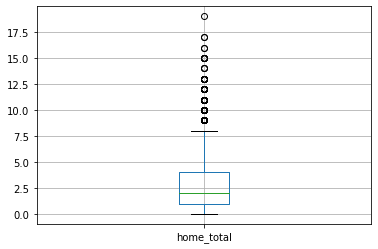

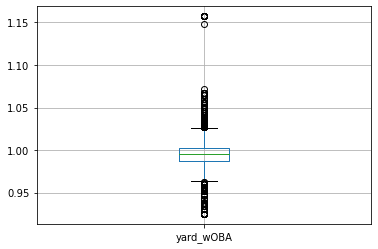

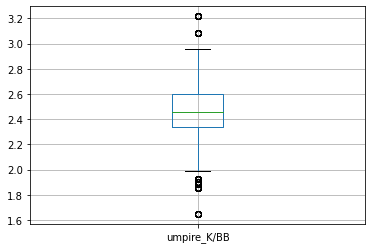

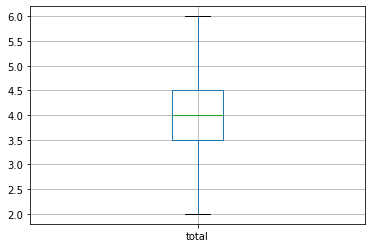

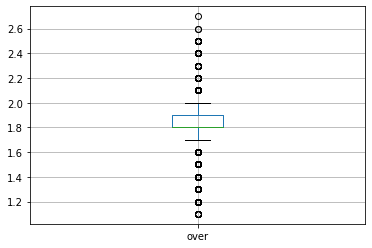

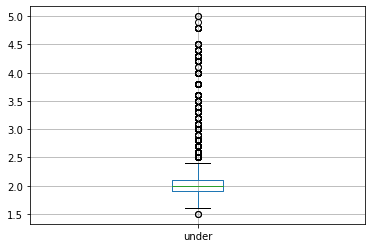

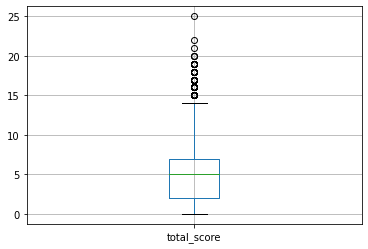

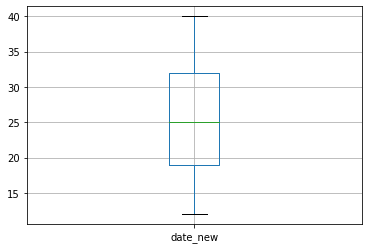

In [14]:
#盒鬚圖確認有無離群值
import matplotlib.pyplot as plt
for col in features:
    df.boxplot(col)
    plt.show()

In [15]:
#去除偏態(嘗試用Q01，Q99來代替離群值）
for i in features:
    Q01 = np.percentile(df[i], 1)
    Q99 = np.percentile(df[i], 99)
    # 替换异常值为指定的分位数
    if Q01 > df[i].min():
        df[i].loc[df[i] < Q01] = Q01
    if Q99 < df[i].max():
        df[i].loc[df[i] > Q99] = Q99

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[features] = mms.fit_transform(df[features])
df

,time,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,away_batter7,away_batter8,...,team_away_PHI,team_away_PIT,team_away_SD,team_away_SEA,team_away_SF,team_away_STL,team_away_TB,team_away_TEX,team_away_TOR,team_away_WSH
0,19,0.585647,0.255130,0.525589,0.265241,0.490699,0.592878,0.467653,0.470049,0.621030,...,0,0,0,0,0,0,0,0,0,0
1,19,0.594566,0.214253,0.758493,0.369768,1.000000,1.000000,0.257240,0.480757,0.455796,...,0,0,0,0,0,0,0,0,0,0
2,13,0.199179,0.183827,0.351375,0.330453,0.282279,0.258949,0.563257,0.405625,0.307251,...,0,0,0,0,0,0,0,0,0,0
3,19,0.463761,0.232673,0.328685,0.612611,0.397369,0.224446,0.536878,0.314816,0.558555,...,0,0,0,0,0,0,0,0,0,0
4,19,0.463761,0.189072,0.549545,0.694804,0.440372,0.548137,0.339642,0.467608,0.274579,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,13,0.000000,0.371077,0.544058,0.486970,0.649154,0.482672,0.419424,0.684509,0.462468,...,0,0,0,0,0,0,0,0,1,0
10178,20,0.615375,0.289657,0.846217,0.307243,0.436662,0.461433,0.347176,0.374212,0.004467,...,0,0,0,0,0,0,0,0,0,0
10179,19,0.615375,0.318265,0.000000,0.229679,0.215538,0.363865,0.165088,0.476245,0.339278,...,0,0,0,0,1,0,0,0,0,0
10180,13,0.948332,0.352360,0.319505,0.558805,0.000000,0.098465,0.843325,0.338208,0.544824,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#設定訓練集
from sklearn.model_selection import train_test_split
train_x = df.drop(['result','total_score','over','under','away_total','home_total'],axis=1)
train_y = df['result']
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state=666)

In [18]:
train_x

,time,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,away_batter7,away_batter8,...,team_away_PHI,team_away_PIT,team_away_SD,team_away_SEA,team_away_SF,team_away_STL,team_away_TB,team_away_TEX,team_away_TOR,team_away_WSH
0,19,0.585647,0.255130,0.525589,0.265241,0.490699,0.592878,0.467653,0.470049,0.621030,...,0,0,0,0,0,0,0,0,0,0
1,19,0.594566,0.214253,0.758493,0.369768,1.000000,1.000000,0.257240,0.480757,0.455796,...,0,0,0,0,0,0,0,0,0,0
2,13,0.199179,0.183827,0.351375,0.330453,0.282279,0.258949,0.563257,0.405625,0.307251,...,0,0,0,0,0,0,0,0,0,0
3,19,0.463761,0.232673,0.328685,0.612611,0.397369,0.224446,0.536878,0.314816,0.558555,...,0,0,0,0,0,0,0,0,0,0
4,19,0.463761,0.189072,0.549545,0.694804,0.440372,0.548137,0.339642,0.467608,0.274579,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,13,0.000000,0.371077,0.544058,0.486970,0.649154,0.482672,0.419424,0.684509,0.462468,...,0,0,0,0,0,0,0,0,1,0
10178,20,0.615375,0.289657,0.846217,0.307243,0.436662,0.461433,0.347176,0.374212,0.004467,...,0,0,0,0,0,0,0,0,0,0
10179,19,0.615375,0.318265,0.000000,0.229679,0.215538,0.363865,0.165088,0.476245,0.339278,...,0,0,0,0,1,0,0,0,0,0
10180,13,0.948332,0.352360,0.319505,0.558805,0.000000,0.098465,0.843325,0.338208,0.544824,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#LogisticRes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
logR = LogisticRegression(penalty='l2',fit_intercept= True, C= 1.0)
logR.fit(X_train, Y_train)
y_pred_logR= logR.predict(X_test)
acc = accuracy_score(Y_test, y_pred_logR)
print(acc)
cross_val_score(logR, X_train, Y_train, cv= 5, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.5883739198743126


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.60143979, 0.56123117, 0.5880812 , 0.58873608, 0.5664702 ])

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=5, random_state=666)
for train_index , test_index in skfolds.split(X_train, Y_train):
    clone_res = clone(logR)
    X_train_folds = X_train.iloc[train_index]
    Y_train_folds = Y_train.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    Y_test_folds = Y_train.iloc[test_index]
    
    clone_res.fit(X_train_folds, Y_train_folds)
    Y_pred_Kfolds = clone_res.predict(X_test_folds)
    n_correct = sum(Y_pred_Kfolds == Y_test_folds)
    print(n_correct/len(Y_pred_Kfolds))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

0.6014397905759162
0.5612311722331369
0.5880812049770793
0.5887360838244925
0.5664702030124427


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
#Non-Linear SVM
#傳統SVM會記憶體爆炸

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
poly_svm_clf = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss= 'hinge'))
])
poly_svm_clf.fit(X_train, Y_train)
Y_pred_polysvm= poly_svm_clf.predict(X_test)
print('Accuracy', accuracy_score(Y_test, Y_pred_polysvm))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy 0.5322073841319718


In [22]:
# kernel poly SVM 
from sklearn.svm import SVC
kernel_poly_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel= 'poly', degree= 3, coef0= 1 , C= 5))
])
kernel_poly_svm_clf.fit(X_train, Y_train)
Y_pred_kpsvm = kernel_poly_svm_clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred_kpsvm))

Accuracy: 0.5404556166535742


In [23]:
# kernel rbf SVM
kernel_rbf_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel= 'rbf', gamma= 5, C= 0.001))
])
kernel_rbf_svm_clf.fit(X_train, Y_train)
Y_pred_krsvm = kernel_rbf_svm_clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred_krsvm))

Accuracy: 0.5345640219952867


In [24]:
#決策樹
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth= 8)
tree_clf.fit(X_train, Y_train)
Y_pred_tree= tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred_tree))

Accuracy: 0.5632364493322859


In [25]:
#要更新插件，到windoow path進行標註才能用
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='tree.dot',
    feature_names=X_train.columns,
    rounded=True,
    filled= True
)

In [26]:
#隨機森林_voting
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
vote_clf = VotingClassifier(estimators=[('logr',log_clf), ('rnd',rnd_clf), ('svc',SVC)],
                            voting='hard')
vote_clf.fit(X_train, Y_train)
Y_pred_vote= vote_clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred_vote))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TypeError: Cannot clone object '<class 'sklearn.svm._classes.SVC'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [27]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1)
bag_clf.fit(X_train, Y_train)
Y_pred_bag = bag_clf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred_bag)) 

Accuracy: 0.5875883739198743


In [28]:
from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1)
rdf_clf.fit(X_train, Y_train)
Y_pred_rdf = rdf_clf.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, Y_pred_rdf))

Accuracy: 0.5875883739198743
